## Question 4

#### a. Implementing random matrix multiplication

In [51]:
# Importing all required libraries
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(920211348) 

In [52]:
def randomized_matrix_mul(A,B, C = 100, sampling_type = 'non-uniform', r = -9999):
    """
    Summary: Function generates the randomized matrix multiplication depending 
    on the parametes passed.
    Args:
        A (np.matrix): Matrix A of dimensions m x n
        B (np.matrix): Matrix B of dimensions n x p
        C (int, optional): A constant used to determine sampling. Defaults to 100.
        sampling_type (str, optional): Decides the type of sampling ie. uniform or non uniform
                                     Defaults to 'non-uniform'.
    
    Returns:
        ans (np.matrix): Matrix C of dimensions m x p obtained by product of A and B
    """
    
    # Selecting n from the input matrices 
    n =A.shape[1]
    
    # Selecting a suitable r given by r = Clogn 
    # where n is the dimension of the matrix
    if r == -9999:
        r = int(np.round(C * np.log(n))) 
    
    # Checking for the sampling type
    if sampling_type == 'uniform': 
        # Probability of sampling is equal ie. 1/n 
        pk = [1/n] * n
    else:
        # Defined as pk = ||A||k ||B ||k / sum_i (||A||i ||B||i)
        total_norm = sum([np.linalg.norm(A[:,k], ord = 2) * np.linalg.norm(B[k,:], ord = 2) for k in range(n)])
        pk = [np.linalg.norm(A[:,k], ord = 2) * np.linalg.norm(B[k,:], ord = 2)/total_norm for k in range(n)]
    
    # getting a sample with the probability distribution pk
    index_range = np.random.choice(range(n),r, replace = True, p = pk)

    # Getting the product of all chosen rank-1 matrices 
    ans = sum((1/(pk[k] * r)) * np.outer(A[:,k], B[k,:]) for k in index_range)
    return ans

#### b. Loading the matrices from the given files and applying it for the given r

In [53]:
# Loading A and B from the CSV files
A = np.matrix(np.loadtxt('STA243_homework_1_matrix_A.csv', delimiter = ','))
B = np.matrix(np.loadtxt('STA243_homework_1_matrix_B.csv', delimiter = ','))

In [54]:
def mul_error(approximate, actual,A,B):
    """Summary: Function to calculate the error between the approximate and actual matrices
    using the Frobenius norm

    Args:
        approximate (np.matrix): The randomized matrix multiplication output
        actual (np.matrix): The actual matrix multiplication output

    Returns:
        _type_: float
    """
    return np.linalg.norm(approximate - actual, ord = 'fro')/((np.linalg.norm(A, ord = 'fro') * np.linalg.norm(B, ord = 'fro')))

#### c. Calculate approximation error of the matrix multiplication

In [55]:
# Calling the functions required

# Checking for various columns mentioned in the question 
r = [20,50,100,200,500]

errors = []
actual = A @ B 
# Non-uniform sampling
for col_val in r:
    approximate = randomized_matrix_mul(A,B,r = col_val, sampling_type = 'non-uniform')
    e = mul_error(approximate, actual,A,B)
    errors.append(e)

# importing the required libraries
from texttable import Texttable
table = Texttable()

table.set_cols_dtype(['f', 'f'])

x = [['Rank', 'Error']] + [[r[i], errors[i]] for i in range(len(errors))]
table.add_rows(x)
print(table.draw())
# for col_val,error in zip(r,errors):
#     print('For r = {} the error is {}'.format(col_val,error))

+---------+-------+
|  Rank   | Error |
+=========+=======+
| 20.000  | 0.207 |
+---------+-------+
| 50.000  | 0.116 |
+---------+-------+
| 100.000 | 0.097 |
+---------+-------+
| 200.000 | 0.075 |
+---------+-------+
| 500.000 | 0.047 |
+---------+-------+


#### d. Visualizing the errors obtained for different r values

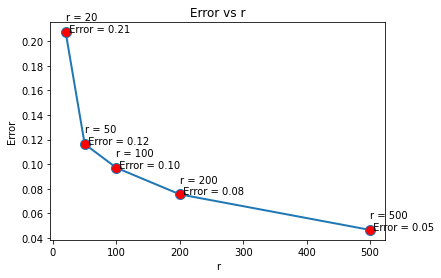

In [56]:
# Visualizing the errors obtained from the random multiplication
plt.plot(r, errors, ls = '-', lw = 2, marker = 'o',
         markersize = 10,
         markerfacecolor = 'red', label = 'Non-uniform sampling')
plt.xlabel('r')
plt.ylabel('Error')
plt.title('Error vs r')
for i in range(len(r)):
    plt.annotate("r = {} \n Error = {:.2f}".format(r[i],errors[i]), (r[i], errors[i]))
    

# Question 5
Implementing Power method for calculating eigenvalues and eigenvectors of a square matrix

In [57]:
def power_iteration(A, v0, eps = 1e-6, maxiter=100):
    """
    Summary: 
    Function to implement the power iteration algorithm to find the eigenvector of the matrix A
    Args:
        A: np.array (d, d) = Matrix A for which the eigenvector is to be found
        v0: np.array (d,) = unit vector to be used as the initial vector
        eps: float  = Error tolerance
        maxiter: int = Maximum number of iterations
    
    Returns:
        v: np.array (d,) = Eigenvector of A
    """
    for _ in range(maxiter):
        # Calculating the dot product of the matrix A and the current vector
        v = A @ v0
        # Normalizing the vector
        v = v/np.linalg.norm(v,2)
        # Checking for the convergence
        if np.linalg.norm(v - v0, 2) < eps:
            return v
        # Updating the current vector
        v0 = v
        
    return v

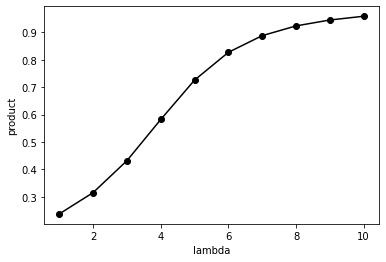

In [58]:
# Implementing the driver code given in the power_sim.py file 
np.random.seed(2022)
E = np.random.normal(size=(10,10))
v = np.array([1]+[0]*9)
lams = np.arange(1, 11)
prods = []
for lam in lams:
    X = lam*np.outer(v,v) + E
    v0 = np.ones(10)
    v0 = v0/np.linalg.norm(v0,2)
    vv = power_iteration(X, v0)
    prods.append(np.abs(v @ vv))

plt.plot(lams, prods, '-ok')
plt.xlabel('lambda')
plt.ylabel('product')
plt.show()


